# Pandas practice using Titatic dataset

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.

In [12]:
df.groupby('Sex')["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

2. 전체 승객(passenger)의 평균 생존율을 구하세요.

In [13]:
df["Survived"].mean()

0.3838383838383838

3.25세 이하 승객의 생존율을 구하세요. 

In [14]:
#df[ df["Age"]<= 25].mean()
df25 = df[df["Age"]<= 25]
#df25.mean()  #모든 숫자 컬럼 평균
df25['Survived'].mean()


#df[df['Age']<=25]["Survived"].mean()

0.4119601328903654

In [15]:
df25 = df[df["Age"]<= 25]
df25["Survived"].sum()  / len(df25["Survived"])

0.4119601328903654

4. 남성의 생존율을 구하세요.

In [16]:
%time df[df['Sex']=='male']["Survived"].mean()

CPU times: total: 0 ns
Wall time: 1.99 ms


0.18890814558058924

In [17]:
%time df.loc[df['Sex']=='male',"Survived"].mean()

CPU times: total: 0 ns
Wall time: 2 ms


0.18890814558058924

In [20]:
%timeit df[df['Sex']=='male']["Survived"].mean()

1.05 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
%timeit df.loc[df['Sex']=='male',"Survived"].mean()

787 µs ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
df.shape

(891, 12)

5. 여성의 생존율을 구하세요. 

In [23]:
df[df['Sex']=='female']["Survived"].mean()

0.7420382165605095

6. 생존율을 구하는 함수 ,survival_ratio()가 다음과 같습니다. survival_ratio()와 groupby를 활용해 성별 생존율을 구하세요.

In [49]:
#df.groupby('Sex')["Survived"].mean()


def survival_ratio(survived):
    return survived.sum()/ len(survived)

df.groupby('Sex')['Survived'].aggregate()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [52]:
df.groupby('Sex')["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

7. 'Sex'별로 생존율을 구하세요

In [8]:
df.groupby('Sex')["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

8.'Pclass'별로 생존율을 구하세요.

<Axes: >

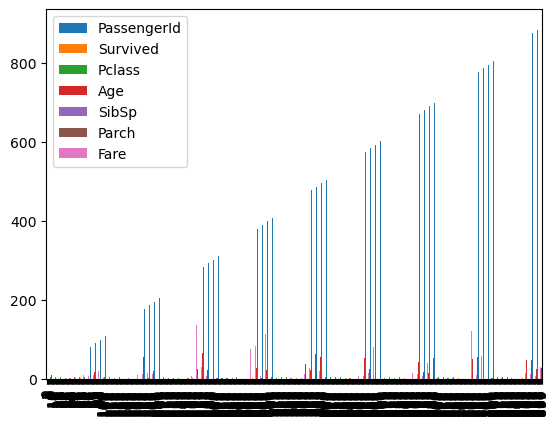

In [24]:
import matplotlib.pyplot as plt

df.groupby('Pclass')["Survived"].mean()
df.plot(kind='bar')  # 내부적으로 matplotlib.pyplot 사용


8.df 데이터에 결손치가 있는지 확인하세요.

In [27]:
#df.info()
df.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

9.'Age'컬럼의 결손치는 중간값으로 할당하고, Age의 결손치가 없음을 확인하세요

In [28]:
mean = df['Age'].mean()
df['Age']=df['Age'].fillna(mean)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

10.'Embarked' 컬럼의 결손치는 값이 가장 많은 값을 구해서, 할당하세요. Embarked의 결손치가 없음을 확인하세요

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
df['Embarked'].nunique()

3

In [38]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
df['Embarked']=df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [49]:
#대표값 구하기
r= df['Embarked'].value_counts().sort_values(ascending=False).head()
top= r.index[0]

df['Embarked']=df['Embarked'].fillna(top)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64